# Modelos de Clasificación

El objetivo es poder clasificar el tipo de riesgo reportado con el fin de poder tomar medidas  preventivas, de mejora, correctivas.

## Preprocesamiento de Datos

In [2]:
import pandas as pd
df = pd.read_parquet('Data/data_cleaned.parquet')

## Clustering - K-Means

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. 

In [3]:
df_enc = df.copy()

In [4]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {
    "armas_medios": LabelEncoder(),
    "genero": LabelEncoder(),
    "grupo_etario": LabelEncoder(),
    "departamento": LabelEncoder(),
    "municipio": LabelEncoder(),   
}

for col, encoder in label_encoders.items():
    df_enc[col] = encoder.fit_transform(df_enc[col])

# Normalización de la columna 'cantidad'
scaler = StandardScaler()
df_enc['cantidad_scaled'] = scaler.fit_transform(df_enc[['cantidad']])

Clustering con K-means y Evaluación con Score Silhouette

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

features_for_clustering = ['armas_medios', 'genero', 'grupo_etario', 'departamento', 'municipio', 'cantidad_scaled']
kmeans = KMeans(n_clusters=3, random_state=42)
df_enc['cluster'] = kmeans.fit_predict(df_enc[features_for_clustering])

In [6]:
df_enc.head(), np.unique('cluster', return_counts=True)

(   departamento  municipio  armas_medios fecha_hecho  genero  grupo_etario  \
 0             1         29             0  2019-01-01       0             1   
 1             1        295             0  2019-01-01       0             1   
 2             1        510             0  2019-01-01       1             1   
 3             1        549             0  2019-01-01       0             1   
 4             4         83             0  2019-01-01       0             1   
 
    cantidad  cantidad_scaled  cluster  
 0         1        -0.297721        1  
 1         1        -0.297721        1  
 2         2         0.347562        2  
 3         1        -0.297721        2  
 4         3         0.992845        1  ,
 (array(['cluster'], dtype='<U7'), array([1], dtype=int64)))

### Aplicando PCA para reducir la dimensionalidad a tres componentes principales

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(df_enc[features_for_clustering])

df_pca = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])

df_pca['Cluster'] = df_enc['cluster']

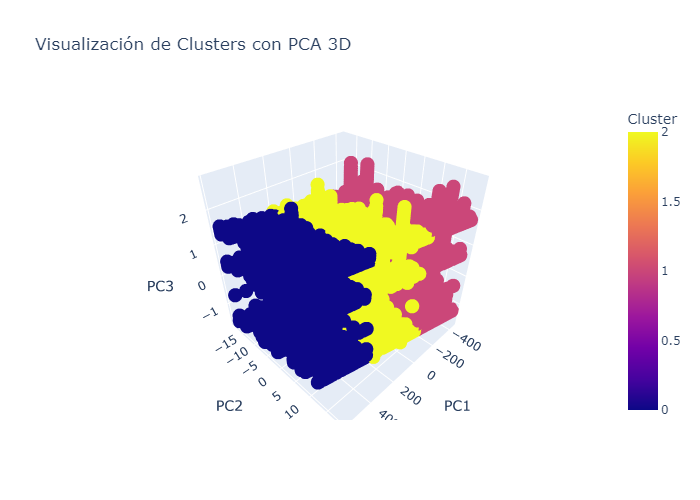

In [8]:
import plotly.io as pio
pio.renderers.default = "png"

import plotly.express as px

pca = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', title="Visualización de Clusters con PCA 3D")
pca.show()

### Cálculo del Silhouette Score

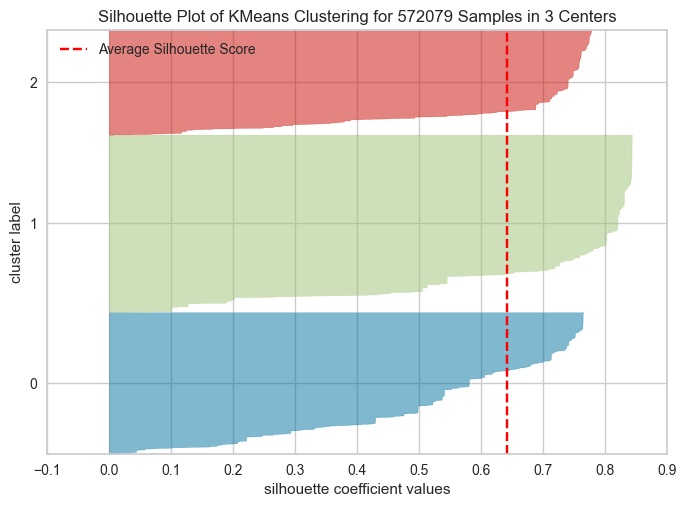

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 572079 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=3))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
df_enc2 = df_enc.drop(['cluster','fecha_hecho'],axis=1)
silhouette_visualizer(KMeans(3),df_enc2,colors="yellowbrick")

### Análisis de los Centros de Clusters

In [9]:
cluster_centers = kmeans.cluster_centers_
print("Centros de los clusters:")
print(cluster_centers)

Centros de los clusters:
[[ 1.49940595e+00  2.23030996e-01  1.00287248e+00  1.40571489e+01
   8.73753012e+02 -1.03533792e-01]
 [ 1.47027626e+00  2.69672351e-01  1.02522041e+00  1.93140914e+01
   1.38566071e+02  7.71626343e-02]
 [ 1.34508587e+00  2.49440655e-01  1.01103557e+00  1.43315211e+01
   5.04379533e+02 -2.19875056e-02]]


In [10]:
# Centroides de los clusters como arreglo NumPy
centroids = np.array([
    [1.49940595, 0.223030996, 1.00287248, 14.0571489, 873.753012, -0.103533792],
    [1.47027626, 0.269672351, 1.02522041, 19.3140914, 138.566071, 0.0771626343],
    [1.34508587, 0.249440655, 1.01103557, 14.3315211, 504.379533, -0.0219875056]
])

# Descripción de los riesgos basada en tu análisis inicial
risks = ['Moderado', 'Alto', 'Bajo']

# Asignar niveles de riesgo a cada cluster usando las descripciones correctas
for i, (centroid, risk) in enumerate(zip(centroids, risks)):
    print(f"Cluster {i}:")
    print(f"  Armas_medios: {centroid[0]}")
    print(f"  Genero: {centroid[1]}")
    print(f"  Grupo_etario: {centroid[2]}")
    print(f"  Departamento: {centroid[3]}")
    print(f"  Municipio: {centroid[4]}")
    print(f"  Cantidad_scaled: {centroid[5]}")
    print(f"  Nivel de Riesgo: {risk}")
    print()


Cluster 0:
  Armas_medios: 1.49940595
  Genero: 0.223030996
  Grupo_etario: 1.00287248
  Departamento: 14.0571489
  Municipio: 873.753012
  Cantidad_scaled: -0.103533792
  Nivel de Riesgo: Moderado

Cluster 1:
  Armas_medios: 1.47027626
  Genero: 0.269672351
  Grupo_etario: 1.02522041
  Departamento: 19.3140914
  Municipio: 138.566071
  Cantidad_scaled: 0.0771626343
  Nivel de Riesgo: Alto

Cluster 2:
  Armas_medios: 1.34508587
  Genero: 0.249440655
  Grupo_etario: 1.01103557
  Departamento: 14.3315211
  Municipio: 504.379533
  Cantidad_scaled: -0.0219875056
  Nivel de Riesgo: Bajo



Estos insights subrayan la importancia de una estrategia diferenciada para abordar la violencia doméstica, adaptada a las características específicas y niveles de riesgo de cada grupo poblacional. Las autoridades podrían utilizar estos datos para optimizar sus recursos y estrategias de intervención, enfocando esfuerzos donde sean más necesarios para reducir eficazmente los incidentes de violencia doméstica.

In [11]:
df['cluster'] = df_enc['cluster']
df.head()

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,cantidad,cluster
0,ANTIOQUIA,AMAGÁ,ARMA BLANCA,2019-01-01,FEMENINO,ADULTOS,1,1
1,ANTIOQUIA,EL SANTUARIO,ARMA BLANCA,2019-01-01,FEMENINO,ADULTOS,1,1
2,ANTIOQUIA,MEDELLÍN (CT),ARMA BLANCA,2019-01-01,MASCULINO,ADULTOS,2,2
3,ANTIOQUIA,NARIÑO,ARMA BLANCA,2019-01-01,FEMENINO,ADULTOS,1,2
4,ATLANTICO,BARRANQUILLA (CT),ARMA BLANCA,2019-01-01,FEMENINO,ADULTOS,3,1


## Modelos de Clasificación

### Desbalanceo

Se valida que tan desbalanceado está el dataset.

In [12]:
df['cluster'].value_counts()

cluster
1    115581
2     92519
0     66493
Name: count, dtype: int64

Según los números que proporcionas para cada clúster:

Clúster 1: 115.581
Clúster 0: 66.493
Clúster 2: 92.519

La distribución de tus clusters sugiere que hay diferencias en el número de elementos en cada grupo: 115,581 en el Cluster 1, 92,519 en el Cluster 2 y 66,493 en el Cluster 0. Si bien no hay una regla estricta sobre qué constituye un "desbalanceo", generalmente se considera que hay desbalance cuando la distribución de clases o grupos es lo suficientemente desigual como para potencialmente sesgar el rendimiento del modelo.

In [13]:
variables = ['departamento', 'municipio', 'armas_medios', 'fecha_hecho', 'genero', 'grupo_etario']
sample_df = df.groupby(variables).sample(frac=0.4, random_state=42)
sample_df.head()

C:\Users\Andres\AppData\Local\Temp\ipykernel_35652\1793699427.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,cantidad,cluster
40069,AMAZONAS,LETICIA (CT),ARMA BLANCA,2019-10-09,FEMENINO,ADULTOS,1,2
59831,AMAZONAS,LETICIA (CT),ARMA BLANCA,2020-01-21,FEMENINO,ADULTOS,1,2
60166,AMAZONAS,LETICIA (CT),ARMA BLANCA,2020-01-22,FEMENINO,MENORES,1,2
65263,AMAZONAS,LETICIA (CT),ARMA BLANCA,2020-02-04,FEMENINO,ADULTOS,1,2
83199,AMAZONAS,LETICIA (CT),ARMA BLANCA,2020-03-24,MASCULINO,MENORES,1,2


In [14]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30268 entries, 40069 to 88103
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   departamento  30268 non-null  category      
 1   municipio     30268 non-null  category      
 2   armas_medios  30268 non-null  category      
 3   fecha_hecho   30268 non-null  datetime64[ns]
 4   genero        30268 non-null  category      
 5   grupo_etario  30268 non-null  category      
 6   cantidad      30268 non-null  int64         
 7   cluster       30268 non-null  int32         
dtypes: category(5), datetime64[ns](1), int32(1), int64(1)
memory usage: 1.0 MB


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# Seleccionar las columnas relevantes para X y y
X = sample_df[['armas_medios', 'cantidad', 'departamento', 'municipio', 'genero', 'grupo_etario']]
y = sample_df['cluster']

### Creación de Pipelines y GridSearchCV

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
import plotly.figure_factory as ff
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [18]:
categorical_features = ['armas_medios', 'departamento', 'municipio', 'genero', 'grupo_etario']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
models = {
    'Random_Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(random_state=42)
}

In [22]:
param_grid = {
    'Random_Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20]},
    'SVM': {'classifier__C': [1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'XGBoost': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.1, 0.01]},
    'MLP': {'classifier__hidden_layer_sizes': [(50,), (100,)], 'classifier__alpha': [0.0001, 0.001]}
}

In [23]:
grid_search_models = {}
for model_name, model in models.items():
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', SMOTE(random_state=42)),
                                  ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search_models[model_name] = grid_search

In [24]:
# Ejecutar GridSearchCV para cada modelo y almacenar los resultados
best_models = {}
for model_name, grid_search in grid_search_models.items():
    print(f"Training {model_name}...")
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Training Random_Forest...
Best parameters for Random_Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Training SVM...
Best parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}
Training XGBoost...
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Training MLP...
Best parameters for MLP: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}


### Evaluación de Modelos

In [25]:
metrics_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
roc_data = {}

In [26]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Crear un DataFrame temporal para este modelo y luego concatenarlo
    temp_df = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })
    metrics_table = pd.concat([metrics_table, temp_df], ignore_index=True)
    
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

C:\Users\Andres\AppData\Local\Temp\ipykernel_12716\2174887250.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### Métricas

In [27]:
print(metrics_table)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random_Forest  0.971369   0.972800  0.971369  0.971645
1            SVM  0.993833   0.993843  0.993833  0.993837
2        XGBoost  0.978196   0.979599  0.978196  0.978523
3            MLP  0.994274   0.994302  0.994274  0.994282


### Curvas ROC

In [40]:
# Modelo Random Forest
data = roc_data['Random_Forest']
fig = go.Figure()
for i in range(len(data['roc_auc'])):
    fig.add_trace(go.Scatter(x=data['fpr'][i], y=data['tpr'][i], mode='lines', 
                             name=f'Class {i} (area = {data["roc_auc"][i]:.2f})'))

In [41]:
fig.update_layout(
    title='ROC Curve for Random Forest',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(range=[0.98, 1.01])
)
fig.show()

In [42]:
# Modelo SVM
data = roc_data['SVM']
fig = go.Figure()
for i in range(len(data['roc_auc'])):
    fig.add_trace(go.Scatter(x=data['fpr'][i], y=data['tpr'][i], mode='lines', 
                             name=f'Class {i} (area = {data["roc_auc"][i]:.2f})'))

In [43]:
fig.update_layout(
    title='ROC Curve for SVM',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(range=[0.98, 1.01])
)
fig.show()

In [44]:
# Modelo XGBoost
data = roc_data['XGBoost']
fig = go.Figure()
for i in range(len(data['roc_auc'])):
    fig.add_trace(go.Scatter(x=data['fpr'][i], y=data['tpr'][i], mode='lines', 
                             name=f'Class {i} (area = {data["roc_auc"][i]:.2f})'))

In [45]:
fig.update_layout(
    title='ROC Curve for XGBoost',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(range=[0.98, 1.01])
)
fig.show()

In [46]:
# Modelo MLP
data = roc_data['MLP']
fig = go.Figure()
for i in range(len(data['roc_auc'])):
    fig.add_trace(go.Scatter(x=data['fpr'][i], y=data['tpr'][i], mode='lines', 
                             name=f'Class {i} (area = {data["roc_auc"][i]:.2f})'))

In [47]:
fig.update_layout(
    title='ROC Curve for MLP',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(range=[0.98, 1.01])
)
fig.show()

### Matrices de confusión

In [48]:
# Random Forest
model_rf = best_models['Random_Forest']
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels_rf = sorted(set(y_test))

In [49]:
fig_rf = ff.create_annotated_heatmap(z=cm_rf, x=labels_rf, y=labels_rf, colorscale='Blues', showscale=True)
fig_rf.update_layout(title_text='Confusion Matrix for Random Forest', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_rf.show()

In [50]:
# SVM
model_svm = best_models['SVM']
y_pred_svm = model_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
labels_svm = sorted(set(y_test))

In [51]:
fig_svm = ff.create_annotated_heatmap(z=cm_svm, x=labels_svm, y=labels_svm, colorscale='Blues', showscale=True)
fig_svm.update_layout(title_text='Confusion Matrix for SVM', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_svm.show()

In [52]:
# XGBoost
model_xgb = best_models['XGBoost']
y_pred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
labels_xgb = sorted(set(y_test))

In [53]:
fig_xgb = ff.create_annotated_heatmap(z=cm_xgb, x=labels_xgb, y=labels_xgb, colorscale='Blues', showscale=True)
fig_xgb.update_layout(title_text='Confusion Matrix for XGBoost', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_xgb.show()

In [54]:
# MLP
model_xgb = best_models['MLP']
y_pred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
labels_xgb = sorted(set(y_test))

In [55]:
fig_xgb = ff.create_annotated_heatmap(z=cm_xgb, x=labels_xgb, y=labels_xgb, colorscale='Blues', showscale=True)
fig_xgb.update_layout(title_text='Confusion Matrix for MLP', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_xgb.show()

### Feature Importance para XGBoost

In [56]:
from sklearn.pipeline import Pipeline

# Feature Importance for XGBoost
xgb_model = best_models['XGBoost']
preprocessor_step = xgb_model.named_steps['preprocessor']
feature_names = preprocessor_step.get_feature_names_out()
    
feature_importances = xgb_model.named_steps['classifier'].feature_importances_
    
importances_df = pd.DataFrame(data=feature_importances, index=feature_names, columns=["Importance"])
importances_df = importances_df.sort_values(by="Importance", ascending=False)

In [57]:
fig = go.Figure(data=[go.Bar(x=importances_df.index, y=importances_df['Importance'])])
fig.update_layout(title='Feature Importance for XGBoost', xaxis_title='Features', yaxis_title='Importance')
fig.show()

Para concluir y comparar los modelos mencionados, consideremos cada una de las métricas de evaluación (Accuracy, Precision, Recall, F1 Score) para entender su rendimiento y situaciones en las que podrían ser preferidos.

### Resultados de los Modelos

Desempeño General:
**SVM (Support Vector Machine) y MLP (Multi-Layer Perceptron)** tienen los mejores rendimientos generales en términos de precisión, exactitud, recuperación (recall) y puntaje F1. Ambos modelos superan el 99% en todas las métricas, lo que indica un excelente ajuste y capacidad de generalización sobre los datos de prueba.

**XGBoost** también muestra un alto rendimiento, con aproximadamente un 97.8% en todas las métricas, posicionándose como un modelo muy efectivo, aunque ligeramente por debajo del SVM y MLP.

**Random Forest** tiene el rendimiento más bajo de los cuatro, pero aún así es bastante alto (alrededor del 97.1% en todas las métricas), lo que sugiere que también es un modelo competente para este conjunto de datos, aunque no tan efectivo como los otros modelos.

### Guardar Modelos

In [105]:
from joblib import dump

# Guardar cada modelo en un archivo .joblib
for name, model in best_models.items():
    file_name = f"{name}_model.joblib"
    dump(model, file_name)
    print(f"Modelo {name} guardado como {file_name}")


Modelo Random_Forest guardado como Random_Forest_model.joblib
Modelo SVM guardado como SVM_model.joblib
Modelo XGBoost guardado como XGBoost_model.joblib
Modelo MLP guardado como MLP_model.joblib


### Asignar Etiquetas

In [106]:
risk_labels = {
    0: 'Riesgo Moderado',
    1: 'Riesgo Alto',
    2: 'Riesgo Bajo'
}

y_pred_labels = [risk_labels[pred] for pred in y_pred]

In [108]:
if len(y_pred_labels) == len(X_test):
    X_test['Predicción'] = y_pred_labels
else:
    print("Error: La longitud de las predicciones no coincide con el número de filas en el DataFrame.")

In [109]:
X_test.head()

,armas_medios,cantidad,departamento,municipio,genero,grupo_etario,Predicción
133318,SIN EMPLEO DE ARMAS,1,CUNDINAMARCA,SOACHA,FEMENINO,ADULTOS,Riesgo Moderado
140207,SIN EMPLEO DE ARMAS,1,ANTIOQUIA,MEDELLÍN (CT),FEMENINO,ADULTOS,Riesgo Bajo
77380,ARMA BLANCA,1,NORTE DE SANTANDER,CÚCUTA (CT),MASCULINO,ADULTOS,Riesgo Alto
68546,ARMA BLANCA,1,ANTIOQUIA,MEDELLÍN (CT),FEMENINO,ADULTOS,Riesgo Bajo
114040,SIN EMPLEO DE ARMAS,1,TOLIMA,IBAGUÉ (CT),MASCULINO,ADULTOS,Riesgo Bajo
